<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 7</b></center>    
<pre>    

# Do all pre processing on diabetes csv

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Import diabetes.csv data ser using sklearn

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Non Diabetic
764,2,122,70,27,0,36.8,0.340,27,Non Diabetic
765,5,121,72,23,112,26.2,0.245,30,Non Diabetic
766,1,126,60,0,0,30.1,0.349,47,Diabetic


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Check the distribution of the target

In [5]:
df.Outcome.value_counts()

Outcome
Non Diabetic    500
Diabetic        268
Name: count, dtype: int64

# Replace zeros with NaN for specific columns

In [6]:
(df == 0).sum() # to check 0 values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df.isnull().sum()  # to check null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# option - 1
# df.Glucose.replace(0, np.nan, inplace=True)

In [9]:
# option - 2
c = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in c:
    df[i].replace(0, np.nan, inplace=True)
    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26372\3507268594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(0, np.nan, inplace=True)


# Check for missing values

In [10]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Fill missing values with median

In [12]:
c = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in c:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26372\2393846981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)


# Convert Targer data into interger code

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.Outcome.replace('Diabetic', 1, inplace=True)
df.Outcome.replace('Non Diabetic' , 0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26372\2644588875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Outcome.replace('Diabetic', 1, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26372\2644588875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [15]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Divide the data into input and output

In [17]:
# option - 1
# inputs = df.iloc[::,:-1:]
# inputs

# option - 2
inputs = df.drop('Outcome', axis='columns')
inputs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [18]:

target = df.Outcome

# import KNN Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# z score : x - mean / std | to implement this formula use StandScaler

# Convert all features into Z score

In [21]:
# Converting all features into the z-score using StandardScaler is important for the following reasons:

# Normalization: It standardizes the features by removing the mean and scaling to unit variance. This ensures that all features contribute equally to the model.

# Improved Convergence: For algorithms like gradient descent, standardizing features can lead to faster convergence.

# Handling Different Scales: Features with different scales can bias the model. Standardizing ensures that each feature has the same scale.

# Improved Performance: Many machine learning algorithms perform better when the data is standardized.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
z_score_inputs = scaler.fit_transform(inputs)

In [24]:
z_score_inputs

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

# Splitting the dataset into the Training set and Test set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(z_score_inputs, target, test_size=0.3,random_state=2)

# Create KNN Model

In [74]:
model_knn = KNeighborsClassifier(n_neighbors=15,p=2)  # You can adjust the number of neighbors

# Fitting KNN   on dataset

In [75]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [76]:
y_pred = model_knn.predict(x_test)

In [77]:
model_knn.score(x_test,y_test)

0.7445887445887446

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  20],
       [ 39,  37]], dtype=int64)

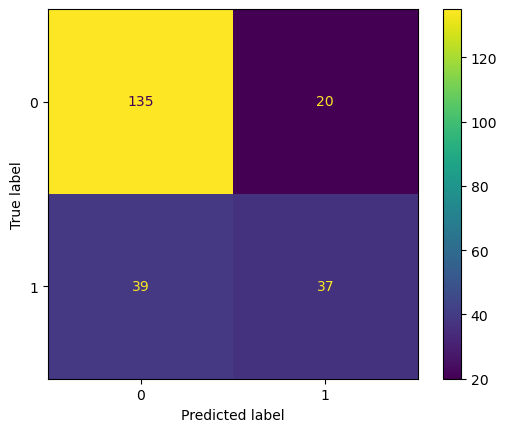

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_knn, x_test, y_test)

# Display classification_report

In [50]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       155
           1       0.59      0.50      0.54        76

    accuracy                           0.72       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.71      0.72      0.72       231



# Use Cross Validation to find best hyperparameter for KNN

# Extra: Use Pipline 